# Prediction of music genre


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('FIT1043-MusicGenre-Dataset.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,70328,Tosca,Swimswimswim,57,0.01400,0.903,252245,0.545,0.004920,0.2240,-7.761,0.0380,120.017,0.9560,5
25954,65621,Wolfgang Amadeus Mozart,"Requiem in D Minor, K. 626: II. Kyrie eleison ...",13,0.99300,0.275,179240,0.409,0.825000,0.2150,-16.666,0.0322,77.858,0.2250,3
25955,82975,Elmore James,Dust My Broom,43,0.01150,0.507,175040,0.660,0.336000,0.3220,-4.957,0.0306,100.783,0.6960,2
25956,36145,Wiz Khalifa,True Colors (feat. Nicki Minaj),50,0.00451,0.805,255147,0.744,0.000000,0.3500,-6.020,0.0572,124.983,0.5190,6


### II. Target Variable or Music genres

In [3]:
print(data.music_genre.value_counts().index)

Index([2, 3, 6, 0, 9, 4, 7, 1, 5, 8], dtype='int64', name='music_genre')


In [4]:
data.music_genre.value_counts()

music_genre
2    2667
3    2626
6    2617
0    2616
9    2593
4    2586
7    2578
1    2575
5    2574
8    2526
Name: count, dtype: int64

### III. Distribution of dataset

<BarContainer object of 10 artists>

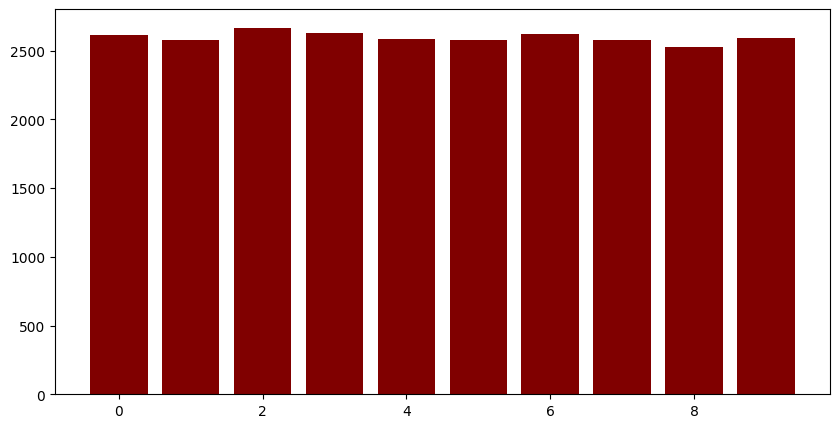

In [5]:
label = data.music_genre.value_counts().index
values =  data.music_genre.value_counts().values
list(label)
list(values)
plt.figure(figsize = (10 , 5))
plt.bar(label , values , color = "maroon")

#### Insight: Data is uniformly distributed

### IV Types of Attributes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25958 entries, 0 to 25957
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       25958 non-null  int64  
 1   artist_name       25958 non-null  object 
 2   track_name        25958 non-null  object 
 3   popularity        25958 non-null  int64  
 4   acousticness      25958 non-null  float64
 5   danceability      25958 non-null  float64
 6   duration_ms       25958 non-null  int64  
 7   energy            25958 non-null  float64
 8   instrumentalness  25958 non-null  float64
 9   liveness          25958 non-null  float64
 10  loudness          25958 non-null  float64
 11  speechiness       25958 non-null  float64
 12  tempo             25958 non-null  float64
 13  valence           25958 non-null  float64
 14  music_genre       25958 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [7]:
print(f'Categorical Features: {len([x for x in data.columns if data[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in data.columns if data[x].dtype == float])}')

Categorical Features: 2
Numerical Features: 9


#### Insights : We can see there are 18 features. Out of 18, 7 are categorical and rest are numerical features but tempo should be numerical. So it is handled



In [8]:
print(data['tempo'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        124.626
1        129.984
2        150.785
3        120.154
4        126.058
          ...   
25953    120.017
25954     77.858
25955    100.783
25956    124.983
25957    146.224
Name: tempo, Length: 25958, dtype: float64>


In [9]:

data.drop(data[data['tempo'] == '?'].index , inplace = True)
data["tempo"] = data["tempo"].astype(float)

print(f'Categorical Features: {len([x for x in data.columns if data[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in data.columns if data[x].dtype == float])}')


Categorical Features: 2
Numerical Features: 9


In [10]:
print(data.shape)

(25958, 15)


# **Descriptive statistics of data**

In [11]:
## For Numerical columns only
data.describe(include=[np.number])

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
count,25958.000000,25958.000000,25958.000000,25958.000000,2.595800e+04,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000
mean,55769.941251,44.168541,0.307858,0.557978,2.454655e+05,0.599596,0.182954,0.193972,-9.167320,0.094058,120.003122,0.458558,4.480083
std,20762.395950,15.547882,0.342093,0.178840,1.105926e+05,0.265468,0.326709,0.162042,6.180744,0.102968,30.612044,0.247895,2.870148
min,20005.000000,0.000000,0.000000,0.059600,1.631600e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000,0.000000
25%,37843.500000,34.000000,0.020300,0.442000,1.904285e+05,0.430000,0.000000,0.096900,-10.898000,0.035900,94.986000,0.260000,2.000000
50%,55740.500000,45.000000,0.146000,0.569000,2.275015e+05,0.645000,0.000167,0.126000,-7.293000,0.048700,119.848500,0.451000,4.000000
75%,73777.750000,55.000000,0.553000,0.686000,2.758930e+05,0.817000,0.158000,0.243000,-5.185000,0.098575,140.493750,0.650000,7.000000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.989000,9.000000


In [12]:
## For string/Object type (Categorical) columns only
data.describe(include=['O'])

,artist_name,track_name
count,25958,25958
unique,5367,23240
top,empty_field,Forever
freq,1273,10


# Data visualization

## 1. Plot Histograms


C:\Users\zfeng\AppData\Local\Temp\ipykernel_9800\4116282413.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.select_dtypes(include=np.number).hist(ax =ax)


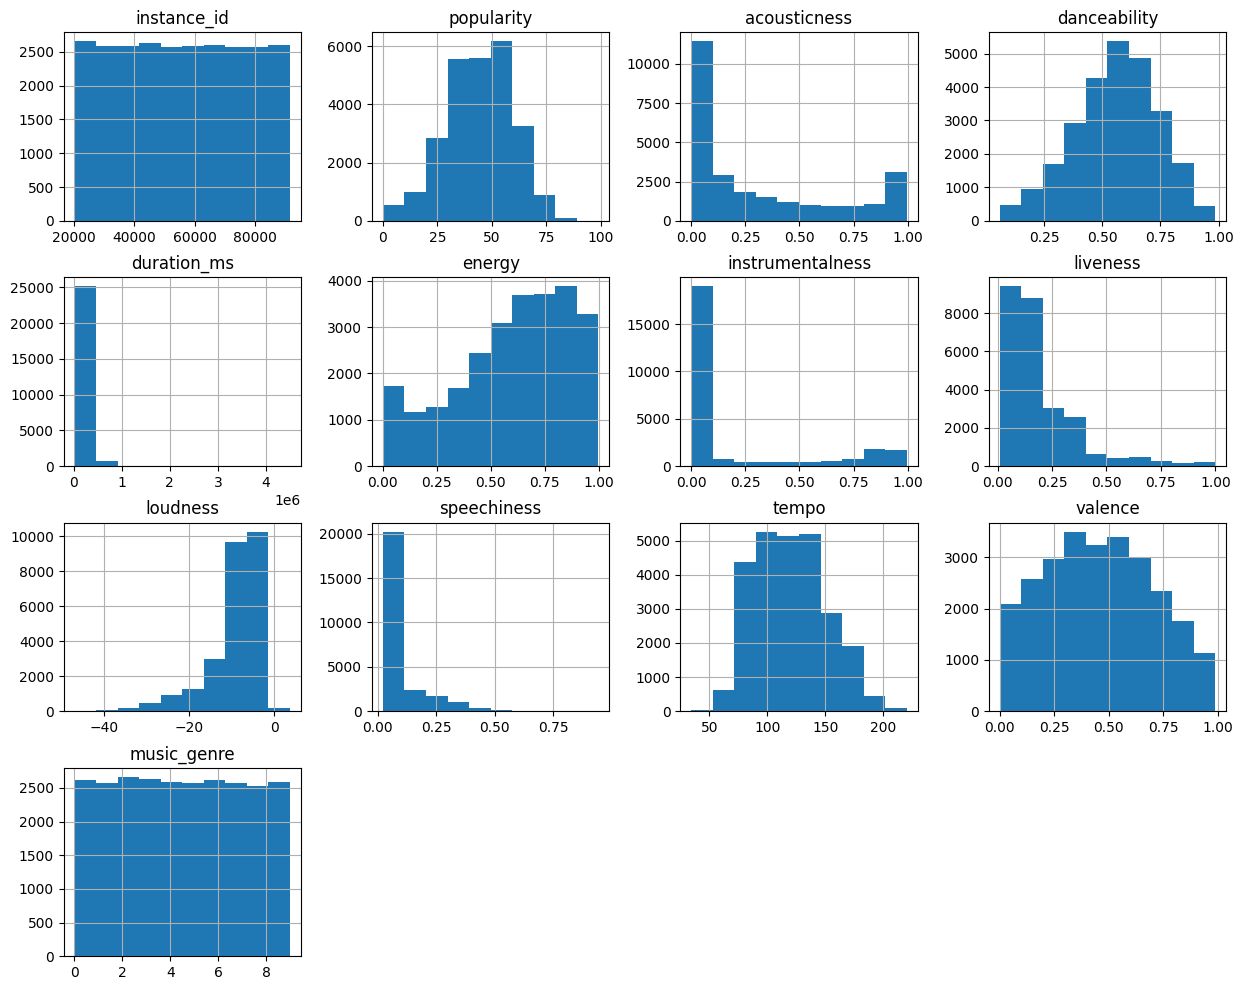

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,12))
ax = plt.axes()
data.select_dtypes(include=np.number).hist(ax =ax)
plt.show()

#### From histogram plot, we can see distribution of each features. #More to add about insights

## Plot correlation matrix for numerical features


<Axes: >

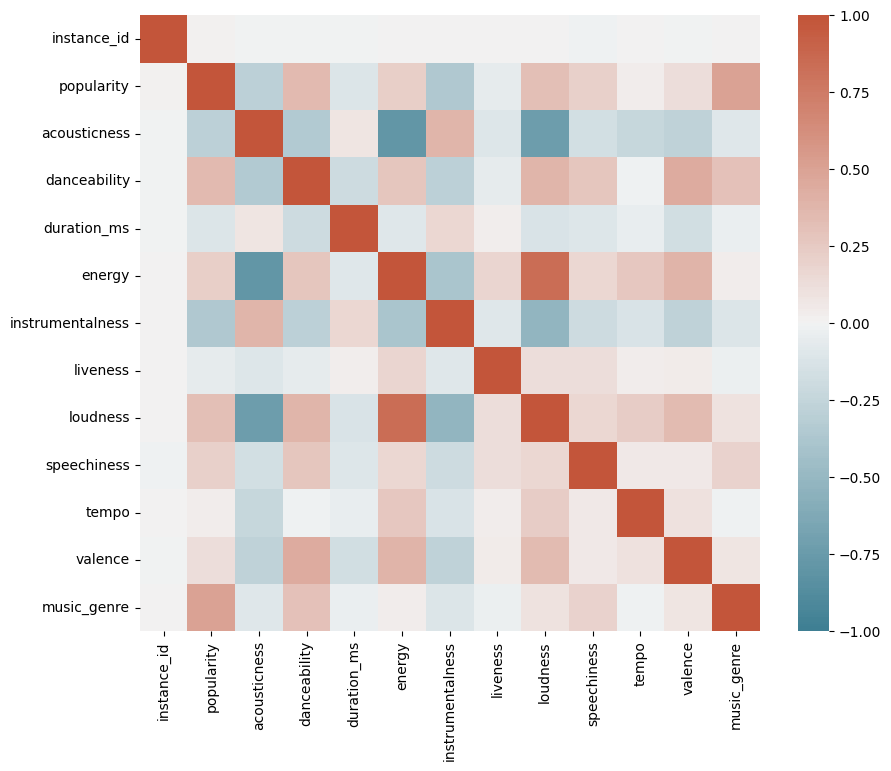

In [14]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

#### Insight: Here we can see loudness and energy are highly correlated. We can remove one of them.

Box plot

<Axes: >

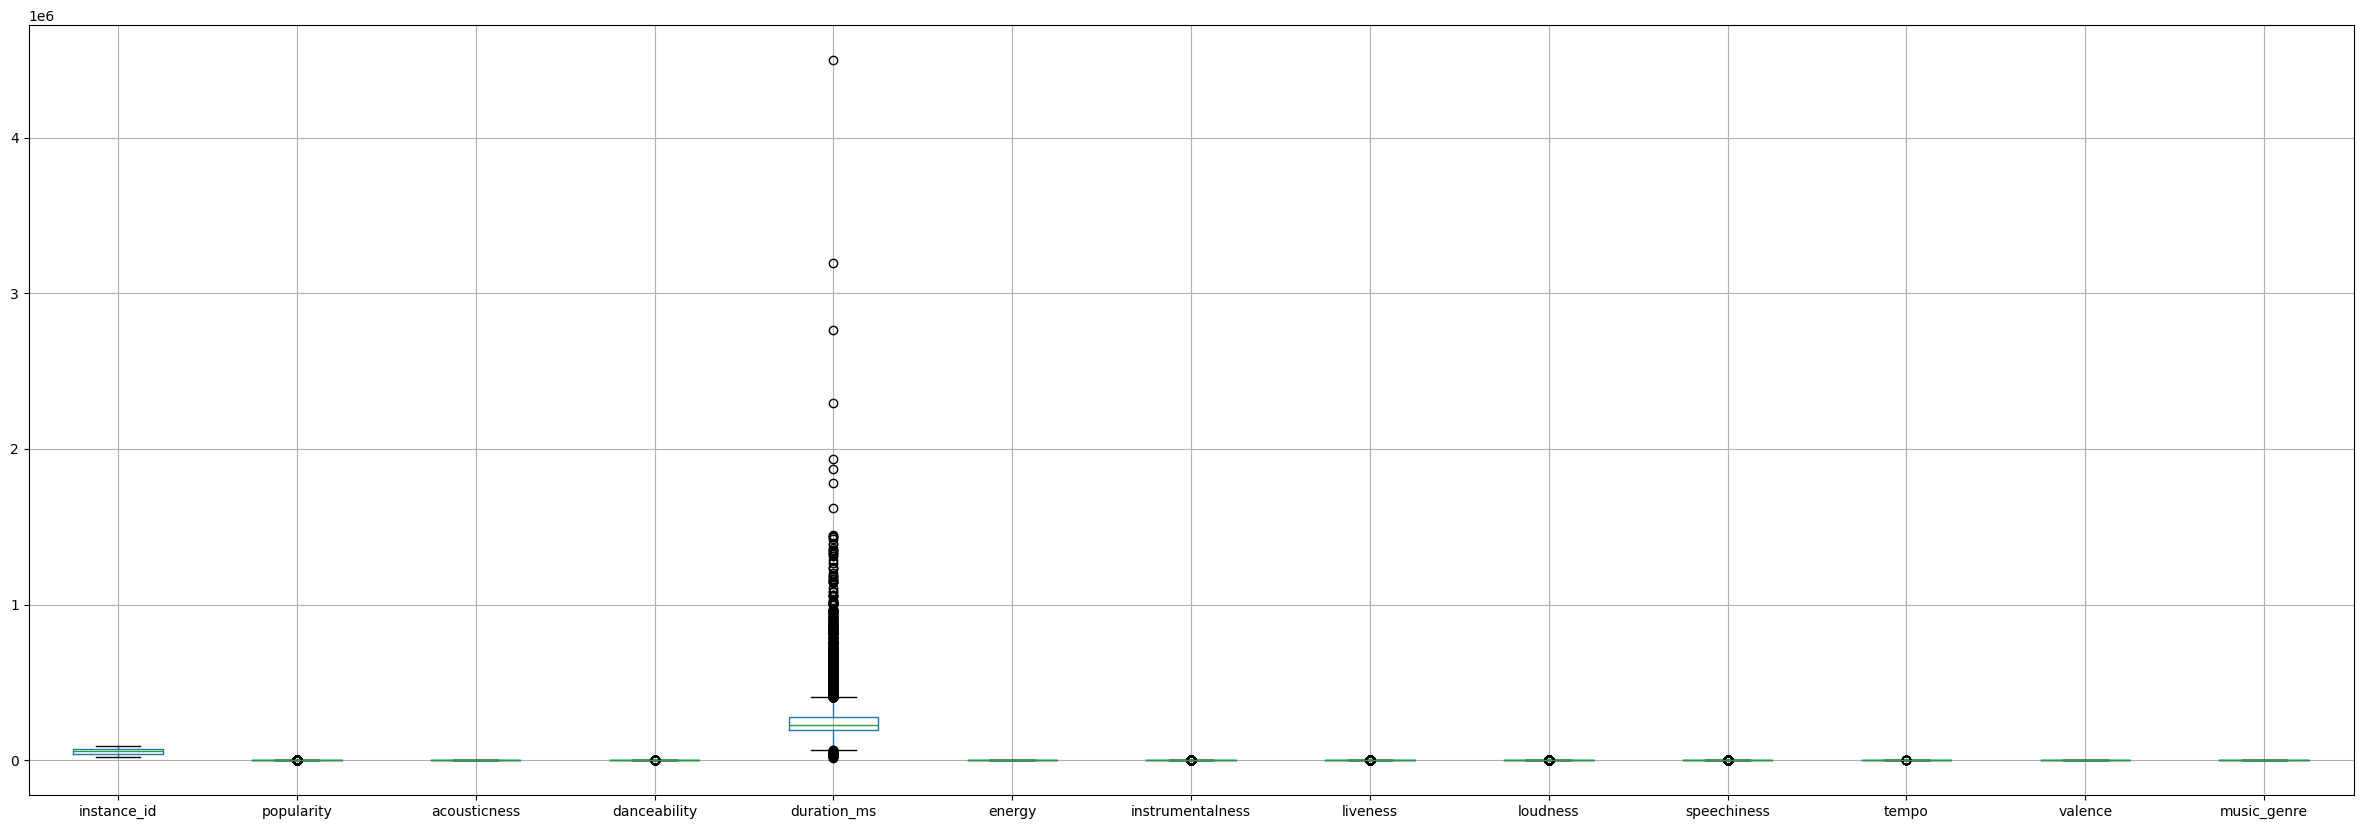

In [15]:
plt.rcParams['figure.figsize'] = 30, 10
data.select_dtypes(include=np.number).boxplot()


#### Insight: We found the most outliers in duration_ms. So handling it...

In [16]:
#converting ms to s
data["duration_ms"]=data["duration_ms"]/1000
data.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224.053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151.067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234.973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307.733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213.512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5


<Axes: >

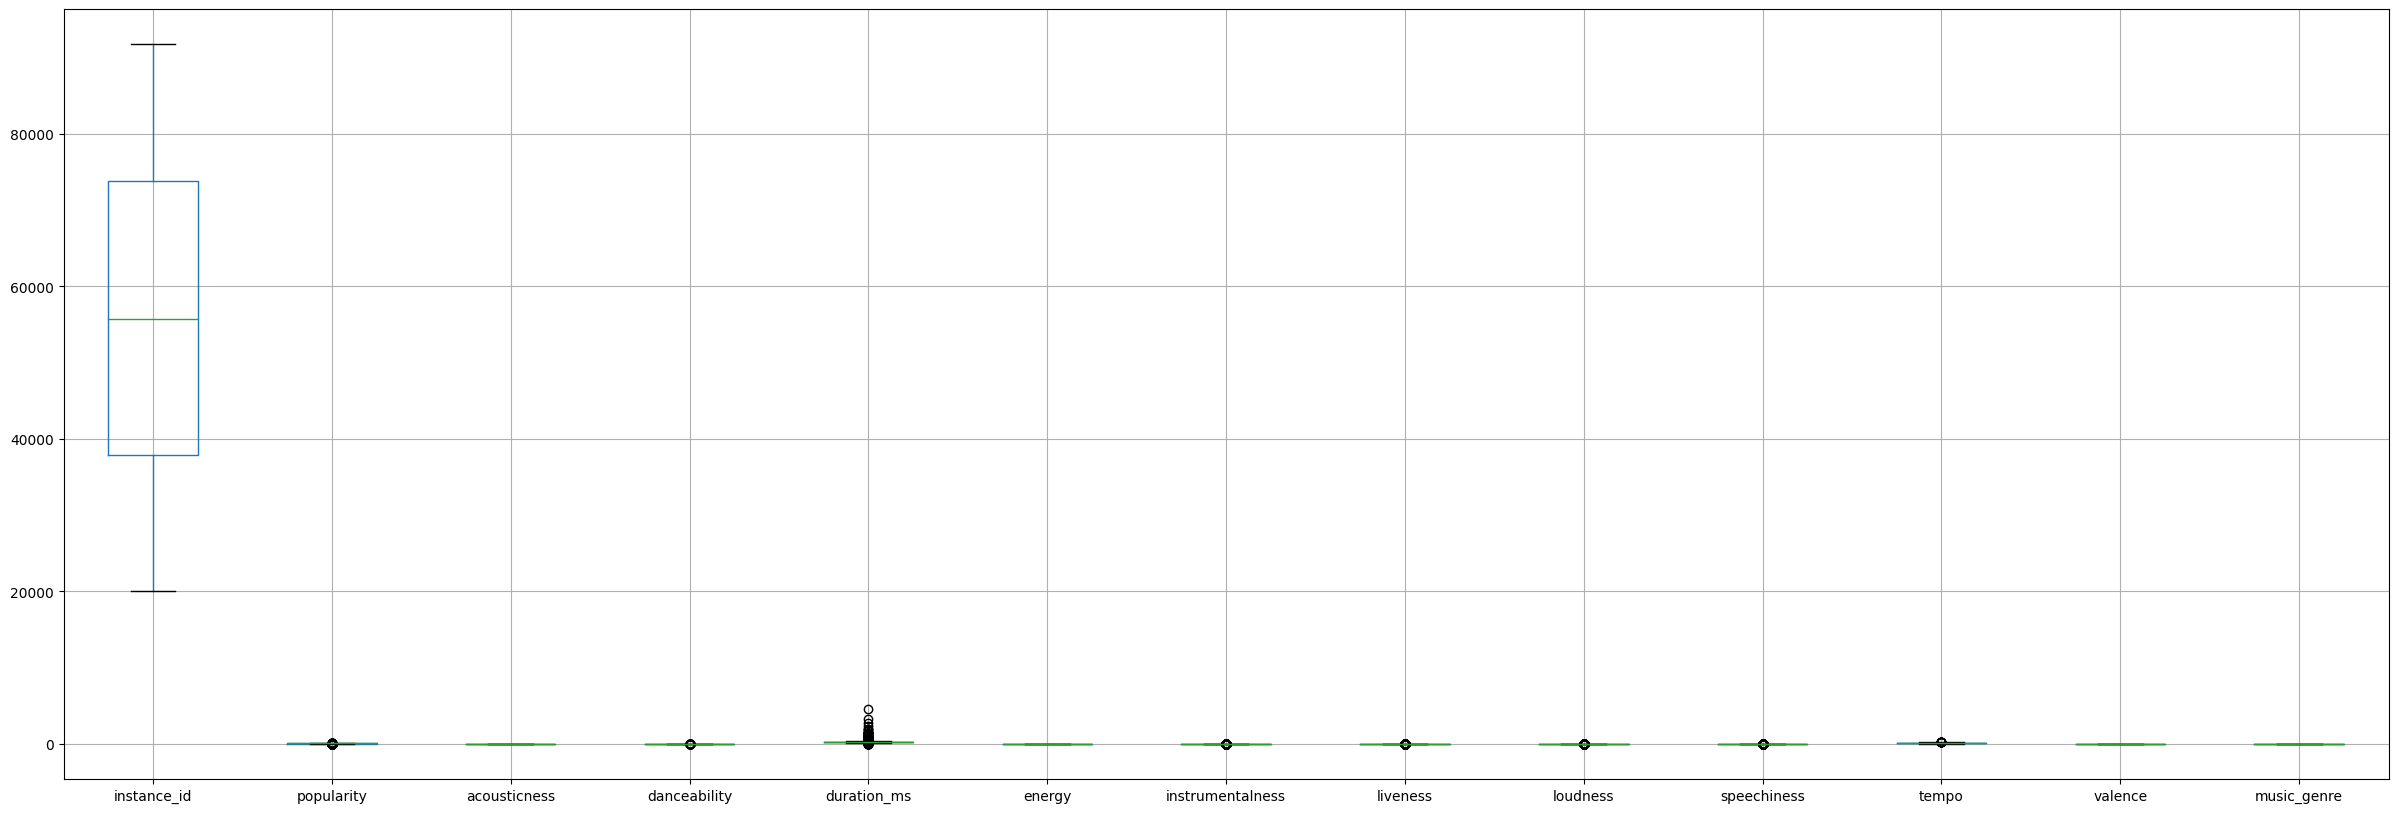

In [17]:
plt.rcParams['figure.figsize'] = 30, 10
data.select_dtypes(include=np.number).boxplot()


# Data cleaning

### Let's see if our data has missing values

In [18]:
data.isnull().any()

instance_id         False
artist_name         False
track_name          False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
tempo               False
valence             False
music_genre         False
dtype: bool

In [19]:
# Number or data that null ??
data.isnull().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [20]:
dataset_null=(data.isna().sum()/len(data))*100.0
dataset_null_ratio=dataset_null.drop(dataset_null[dataset_null==0].index).sort_values(ascending=False)
print(dataset_null_ratio)

Series([], dtype: float64)


In [21]:
X = data.drop(['music_genre'], axis=1)
y =  data['music_genre']


In [22]:
X['acousticness_energy'] = X['acousticness'] * X['energy']

In [23]:
from sklearn.preprocessing import TargetEncoder

artist_encoder = TargetEncoder(smooth='auto', shuffle=True, random_state=42)

encoded_artist_train_X = artist_encoder.fit_transform(X[['artist_name']], y)


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X.drop(columns = ['artist_name','track_name'], axis=1, inplace=True)

scaled_train_X = scaler.fit_transform(X)


In [25]:
X_train = np.column_stack((scaled_train_X, encoded_artist_train_X))

# Model building

In [28]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

print(f"Found TF-DF {tfdf.__version__}")

NotFoundError: c:\Users\zfeng\Documents\Interships Projects\.venv\lib\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found

In [ ]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in X_train],
    exclude_non_specified_features=True, # Only use the features in "features"
    random_seed=1234,
)
model.fit(data)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

In [ ]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in X_train],
    exclude_non_specified_features=True, # Only use the features in "features"
    
    #num_trees=2000,
    
    # Only for GBT.
    # A bit slower, but great to understand the model.
    # compute_permutation_variable_importance=True,
    
    # Change the default hyper-parameters
    # hyperparameter_template="benchmark_rank1@v1",
    
    #num_trees=1000,
    #tuner=tuner
    
    min_examples=1,
    categorical_algorithm="RANDOM",
    #max_depth=4,
    shrinkage=0.05,
    #num_candidate_attributes_ratio=0.2,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=2.0,
    num_trees=2000,
    #validation_ratio=0.0,
    random_seed=1234,
    
)
model.fit(data)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

# Performance metrics

In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=1000)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

#tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                     ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

# Tune the model. Notice the `tuner=tuner`.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.fit(data, verbose=0)

tuned_self_evaluation = tuned_model.make_inspector().evaluation()
print(f"Accuracy: {tuned_self_evaluation.accuracy} Loss:{tuned_self_evaluation.loss}")